# <font color='red'>Clustering Assignment</font>

**There will be some functions that start with the word "grader" ex: grader_actors(), grader_movies(), grader_cost1() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

**Please check [clustering assignment helper functions](https://drive.google.com/file/d/1V29KhKo3YnckMX32treEgdtH5r90DIjU/view?usp=sharing) notebook before attempting this assignment.**

*  Read graph from the given <font color='blue'>movie_actor_network.csv</font> (note that the graph is bipartite graph.)

*  Using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph. [Refer <font color='blue'>Clustering_Assignment_Reference.ipynb</font>]

* Split the dense representation into actor nodes, movies nodes.(Write you code in <font color='blue'>def data_split()</font>)


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install scikit-learn --upgrade --quiet
!pip install stellargraph --quiet

In [4]:
from gensim.models import Word2Vec

In [5]:
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph

In [6]:
from matplotlib import pyplot as plt

In [7]:
from networkx.algorithms import bipartite

In [8]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [9]:
from tqdm import tqdm

In [10]:
import networkx as nx
import numpy as np
import pandas as pd

In [11]:
data_file_path = "/content/drive/MyDrive/Applied-AI/Assignment-14/movie_actor_network.csv"

In [12]:
data = pd.read_csv(filepath_or_buffer=data_file_path, index_col=False, names=['movie','actor'])

In [13]:
data.shape

(9650, 2)

In [14]:
data.isnull().sum()

movie    0
actor    0
dtype: int64

In [15]:
edges = [tuple(x) for x in data.values.tolist()]

In [16]:
B = nx.Graph()
B.add_nodes_from(nodes_for_adding=data['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(nodes_for_adding=data['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(ebunch_to_add=edges, label='acted')

In [17]:
A = list(B.subgraph(c) for c in nx.connected_components(G=B))[0]

In [18]:
print("Number of nodes: {}.".format(A.number_of_nodes()))
print("Number of edges: {}.".format(A.number_of_edges()))

Number of nodes: 4703.
Number of edges: 9650.


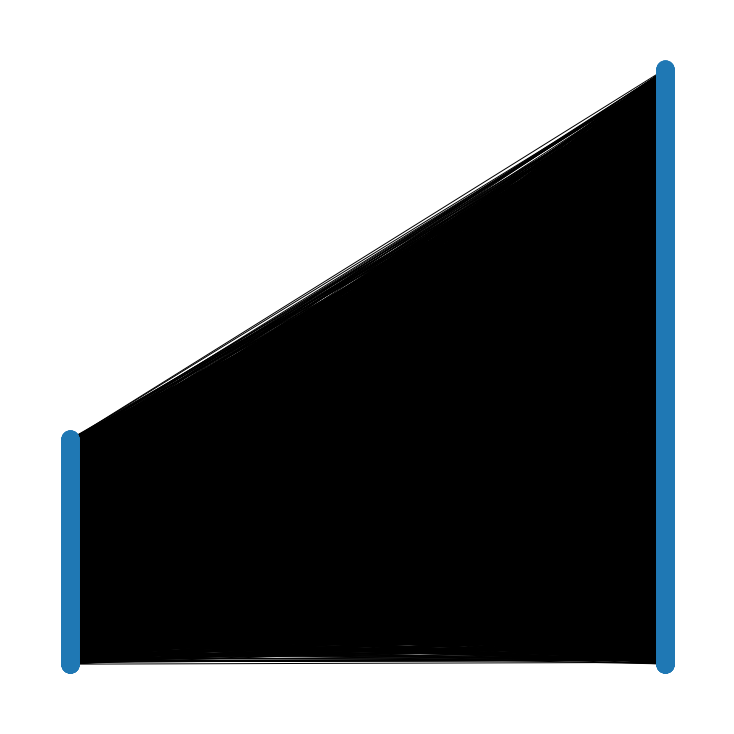

In [19]:
l, r = nx.bipartite.sets(A)

pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))

plt.figure(figsize=(10, 10))
nx.draw(G=A, pos=pos, with_labels=False)
plt.show()

In [20]:
rw = UniformRandomMetaPathWalk(StellarGraph(A))

metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(A.nodes()), length=100, n=1, metapaths=metapaths)
print("Number of random walks: {}.".format(len(walks)))

Number of random walks: 4703.


In [21]:
print(len(walks[0]))
print(walks[0])

100
['m1', 'a1', 'm3', 'a7', 'm3', 'a6', 'm1177', 'a6', 'm1177', 'a1248', 'm1177', 'a52', 'm830', 'a51', 'm855', 'a1933', 'm855', 'a2002', 'm855', 'a1959', 'm848', 'a1959', 'm855', 'a970', 'm527', 'a973', 'm894', 'a973', 'm792', 'a973', 'm523', 'a1023', 'm1066', 'a1021', 'm1066', 'a1060', 'm1083', 'a1060', 'm721', 'a1028', 'm310', 'a1019', 'm365', 'a996', 'm249', 'a996', 'm815', 'a1011', 'm973', 'a1028', 'm970', 'a1028', 'm695', 'a971', 'm305', 'a1004', 'm625', 'a973', 'm715', 'a1034', 'm366', 'a93', 'm1329', 'a93', 'm1370', 'a138', 'm1226', 'a138', 'm1037', 'a2139', 'm949', 'a2307', 'm949', 'a2247', 'm931', 'a2246', 'm949', 'a2307', 'm949', 'a2308', 'm949', 'a2309', 'm949', 'a967', 'm329', 'a973', 'm702', 'a965', 'm313', 'a966', 'm764', 'a966', 'm693', 'a1016', 'm291', 'a973', 'm760', 'a965', 'm763', 'a965']


In [22]:
model = Word2Vec(sentences=walks, size=128, window=5)

In [23]:
print(model.wv.vectors.shape)

(4703, 128)


In [24]:
node_ids = model.wv.index2word
node_embeddings = model.wv.vectors
node_targets = [A.nodes[node_id]['label'] for node_id in node_ids]

In [25]:
print(node_ids[:15])
print(node_targets[:15])
print(node_embeddings[0])
print(node_embeddings.shape)

['a973', 'a967', 'a964', 'a1731', 'a970', 'a969', 'a1057', 'a965', 'a1028', 'a1003', 'm1111', 'm1094', 'm67', 'a966', 'a959']
['actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'movie', 'movie', 'movie', 'actor', 'actor']
[ 0.40434295 -0.16550344 -0.04714185  0.2148354   1.713374   -0.47005337
  1.6216252  -1.037074    1.6390777   0.13530177 -0.01141123 -0.43970922
 -0.70834583  1.6599169   0.46472794  2.123588   -0.12915754 -1.6664424
 -0.26779708  1.031853    1.0591024   1.9701737  -2.5949826  -1.0937151
 -0.52784765  1.3261722  -0.5927374   1.0349041  -1.1048162   2.149454
  0.16602808 -2.1242921  -1.3208829  -0.1706955   0.44741222  0.9048824
 -0.10146864  1.4053026  -1.2802979   0.13816656  0.3733671  -0.91543853
  0.3076812   0.35174534  1.0326351   1.9614575   0.44794855  1.1552532
 -0.21832822  3.1868463   0.9089047   0.8359257  -1.1687286  -0.2877661
  1.9576021   1.477917   -1.6607492  -1.2250742  -0.7058189   0.01564132
  1.1881642  -0

In [26]:
trans = TSNE(n_components=2)
node_embeddings_2d = trans.fit_transform(X=node_embeddings)

In [27]:
label_map = {l: i for i, l in enumerate(np.unique(node_targets))}
node_colors = [label_map[target] for target in node_targets]
print(label_map)
print(node_colors[:10])

{'actor': 0, 'movie': 1}
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


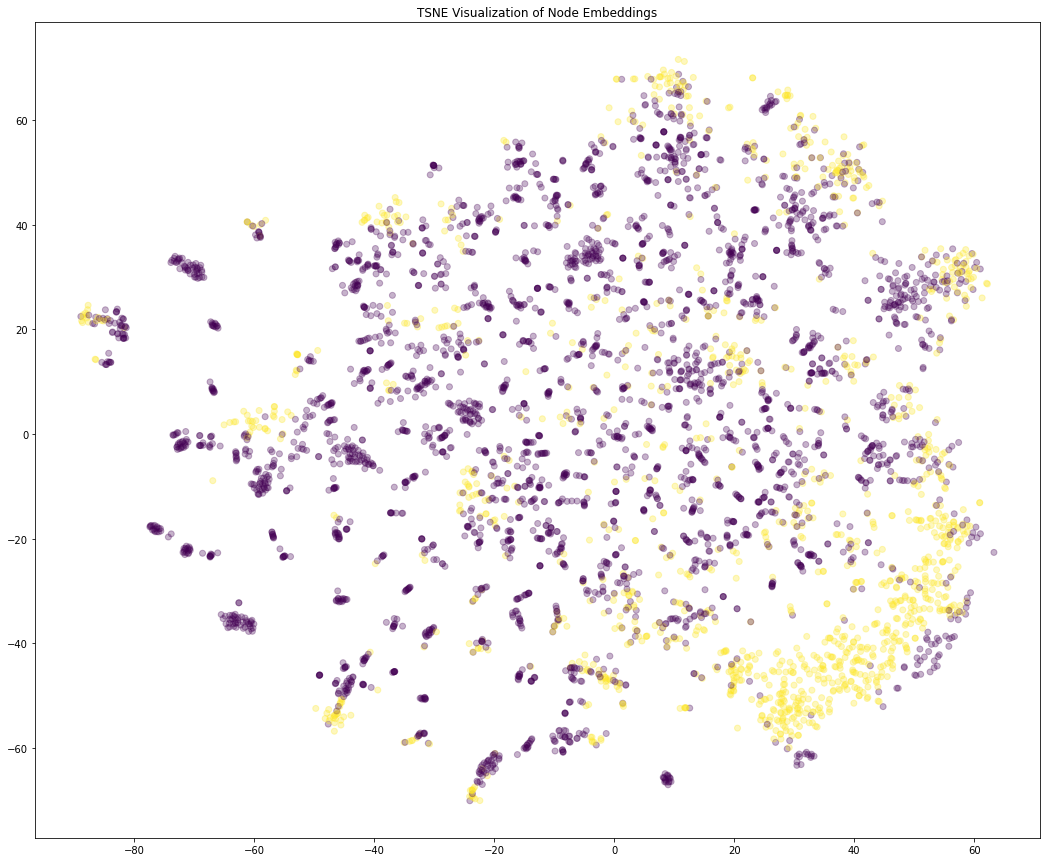

In [28]:
plt.figure(figsize=(18, 15))
plt.scatter(x=node_embeddings_2d[:, 0], y=node_embeddings_2d[:, 1], c=node_colors, alpha=0.3)
plt.title(label='TSNE Visualization of Node Embeddings')
plt.show()

In [29]:
def data_split(node_ids, node_targets, node_embeddings):
    """
    In this function, we will split the node embeddings into actor_embeddings, movie_embeddings.
    """
    actor_nodes = [node for node in node_ids if node.startswith('a')]
    movie_nodes = [node for node in node_ids if node.startswith('m')]
    actor_embeddings, movie_embeddings = list(), list()
    for nei in range(node_embeddings.shape[0]):
        if node_targets[nei] == 'actor':
            actor_embeddings.append(list(node_embeddings[nei]))
        else:
            movie_embeddings.append(list(node_embeddings[nei]))
    return actor_nodes, movie_nodes, actor_embeddings, movie_embeddings

In [30]:
(actor_nodes, 
 movie_nodes, 
 actor_embeddings, 
 movie_embeddings) = data_split(node_ids=node_ids, 
                                node_targets=node_targets, 
                                node_embeddings=node_embeddings)

<font color='cyan'>Grader function - 1</font>

In [31]:
def grader_actors(data):
    assert(len(data) == 3411)
    return True
grader_actors(data=actor_nodes)

True

<font color='cyan'>Grader function - 2</font>

In [32]:
def grader_movies(data):
    assert(len(data) == 1292)
    return True
grader_movies(data=movie_nodes)

True

{'a11': (1, 0), 'a1': (1, 1), 'a10': (1, 2), 'a5': (1, 3), 'm4': (2, 0), 'm6': (2, 1), 'm2': (2, 2), 'm8': (2, 3), 'm1': (2, 4), 'm5': (2, 5)}


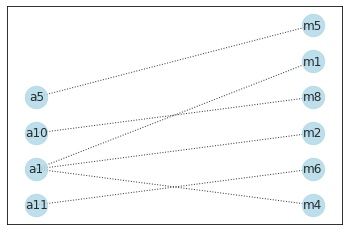

In [33]:
graded_graph = nx.Graph()
graded_graph.add_nodes_from(nodes_for_adding=['a1', 'a5', 'a10', 'a11'], bipartite=0)
graded_graph.add_nodes_from(nodes_for_adding=['m1', 'm2', 'm4', 'm6', 'm5', 'm8'], bipartite=1)
graded_graph.add_edges_from(ebunch_to_add=[('a1', 'm1'), ('a1', 'm2'), ('a1', 'm4'), 
                                           ('a11', 'm6'), ('a5', 'm5'), ('a10', 'm8')])

l = {'a1', 'a5', 'a10', 'a11'}
r = {'m1', 'm2', 'm4', 'm6', 'm5', 'm8'}

pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
print(pos)
nx.draw_networkx(G=graded_graph, 
                 pos=pos, 
                 with_labels=True, 
                 node_color='lightblue', 
                 alpha=0.8, 
                 style='dotted', 
                 node_size=500)
plt.show()

4 nodes --> ['a1', 'm4', 'm2', 'm1'].
3 edges.


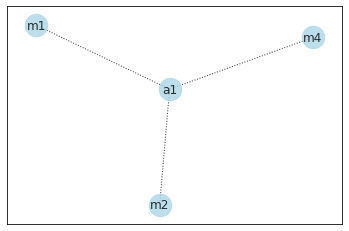

2 nodes --> ['a5', 'm5'].
1 edges.


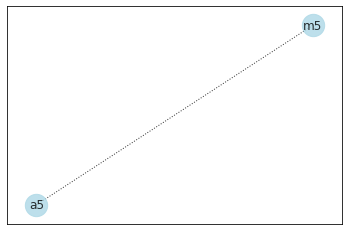

2 nodes --> ['m8', 'a10'].
1 edges.


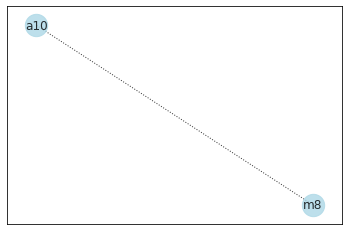

2 nodes --> ['a11', 'm6'].
1 edges.


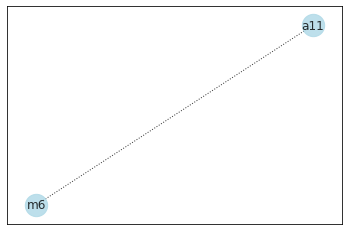

In [34]:
subgraphs = [graded_graph.subgraph(c) for c in nx.connected_components(G=graded_graph)]
for subgraph in subgraphs:
    print("{} nodes --> {}.".format(len(subgraph.nodes), subgraph.nodes))
    print("{} edges.".format(len(subgraph.edges)))
    nx.draw_networkx(G=subgraph, 
                    with_labels=True, 
                    node_color='lightblue', 
                    alpha=0.8, 
                    style='dotted', 
                    node_size=500)
    plt.show()

<img src='https://i.imgur.com/4SPYPFa.jpg'>

<font color='blue'>Calculating cost1</font>

$\text{Cost1} = \frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$, where N = number of clusters.

In [35]:
def cost1(graph, number_of_clusters):
    """
    In this function, we will calculate cost1.
    """
    all_subgraphs = [graph.subgraph(c) for c in nx.connected_components(G=graph)]
    numerator = max([len(subg.nodes) for subg in all_subgraphs])
    denominator = len(graph.nodes)
    cost1 = (1 / number_of_clusters) * (numerator / denominator)
    return cost1

<font color='cyan'>Grader function - 3</font>

In [36]:
graded_cost1 = cost1(graph=graded_graph, number_of_clusters=3)
def grader_cost1(data):
    assert(data == ((1/3) * (4/10)))
    return True
grader_cost1(data=graded_cost1)

True

<font color='blue'>Calculating cost2</font>

$\text{Cost2} = \frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$, where N = number of clusters.

In [37]:
def cost2(graph, number_of_clusters, s='a'):
    """
    In this function, we will calculate cost2.
    """
    numerator = len(graph.edges)
    all_nodes = list(graph.nodes)
    if s == 'a':
        slist = set([i for i in all_nodes if i.startswith('m')])
    else:
        slist = set([i for i in all_nodes if i.startswith('a')])
    denominator = len(slist)
    cost2 = (1 / number_of_clusters) * (numerator / denominator)
    return cost2

<font color='cyan'>Grader function - 4</font>

In [38]:
graded_cost2 = cost2(graph=graded_graph, number_of_clusters=3)
def grader_cost2(data):
    assert(data == ((1/3) * (6/6)))
    return True
grader_cost2(graded_cost2)

True

**Algorithm for actor/movie nodes**

<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
        You can get the labels for corresponding actor nodes (algo.labels_)
        Create a graph for every cluster(ie., if n_clusters=3, create 3 graphs)
        (You can use ego_graph to create subgraph from the actual graph)
        compute cost1,cost2 
           (if n_cluster=3, cost1=cost1(graph1)+cost1(graph2)+cost1(graph3) # here we are doing summation
            cost2=cost2(graph1)+cost2(graph2)+cost2(graph3)
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

# <font color='red'>Task 1 : Apply clustering algorithm to group similar actors</font>

 1. For this task consider only the actor nodes 
 2. Apply any clustering algorithm of your choice <br>
    Refer : https://scikit-learn.org/stable/modules/clustering.html
 3. Choose the number of clusters for which you have maximum score of <b>$\text{Cost1} * \text{Cost2}$</b><br>
 4. $\text{Cost1} = \frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters 
<br> (Write your code in <font color='blue'>def cost1()</font>)<br>
 5. $\text{Cost2} = \frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 
 <br> (Write your code in <font color='blue'>def cost2()</font>)<br>
 6. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
 7. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
 8. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color

<font color='blue'>Grouping similar actors</font>

In [39]:
def actor_clustering(data, actor_embeddings, actor_nodes, number_of_clusters):
    """
    This function groups similar actors.
    """
    all_costs = list()
    for each_cluster in tqdm(number_of_clusters):
        cost_1_list = list()
        cost_2_list = list()

        algo = KMeans(n_clusters=each_cluster)
        algo.fit(X=actor_embeddings)
        actor_labels = algo.labels_
        unique_labels = np.unique(ar=actor_labels) # unique labels obtained
        actor_label_df = pd.DataFrame() # dataframe of actors based on labels
        actor_label_df['actor'] = actor_nodes
        actor_label_df['label'] = actor_labels

        for ul in unique_labels:
            each_actor_label_df = actor_label_df[actor_label_df['label'] == ul]
            actor_for_label = each_actor_label_df['actor'].values

            actor_movie_df_list = list()
            for each_actor in actor_for_label:
                a_m_df = data[data['actor'] == each_actor]
                actor_movie_df_list.append(a_m_df)
            
            a_m_df_final = pd.concat(objs=actor_movie_df_list)
            edgs = list(map(tuple, a_m_df_final.values.tolist()))
            a_unique = a_m_df_final['actor'].unique()
            m_unique = a_m_df_final['movie'].unique()

            B = nx.Graph()
            B.add_nodes_from(nodes_for_adding=a_unique, bipartite=0, label='actor')
            B.add_nodes_from(nodes_for_adding=m_unique, bipartite=1, label='movie')
            B.add_edges_from(ebunch_to_add=edgs, label='acted')

            c1 = cost1(graph=B, number_of_clusters=each_cluster)
            cost_1_list.append(c1)
            c2 = cost2(graph=B, number_of_clusters=each_cluster, s='a')
            cost_2_list.append(c2)
        
        cost_metric = sum(cost_1_list) * sum(cost_2_list)
        all_costs.append(cost_metric)
    
    ideal_cluster_size = number_of_clusters[np.argmax(a=np.array(all_costs))]
    print("\nThe ideal cluser size is: {}.".format(ideal_cluster_size))

    plt.figure(figsize=(10, 8))
    plt.plot(number_of_clusters, all_costs, 'o-')
    plt.grid(True)
    plt.title(label='Elbow Curve')
    plt.xlabel(xlabel='K')
    plt.ylabel(ylabel='Costs')
    plt.show()
    
    return ideal_cluster_size

In [40]:
number_of_clusters = [3, 5, 10, 30, 50, 100, 200, 500]

100%|██████████| 8/8 [01:10<00:00,  8.84s/it]


The ideal cluser size is: 3.


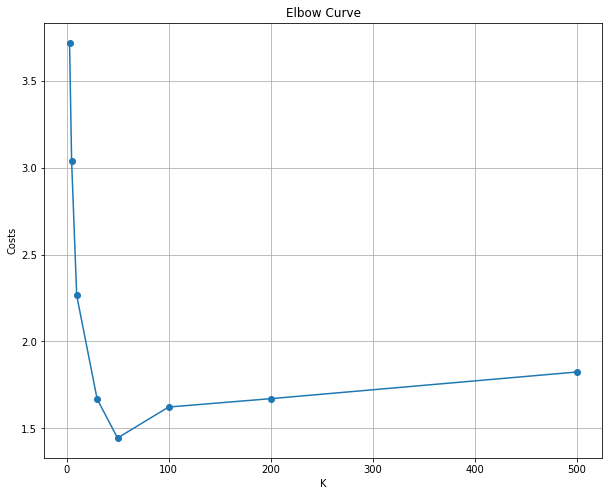

In [41]:
ideal_cluster_size = actor_clustering(data=data, 
                                      actor_embeddings=actor_embeddings, 
                                      actor_nodes=actor_nodes, 
                                      number_of_clusters=number_of_clusters)

<font color='blue'>Displaying similar actor clusters</font>

In [42]:
def display_actor_cluster(actor_embeddings, ideal_cluster_size):
    algo = KMeans(n_clusters=ideal_cluster_size)
    algo.fit(X=actor_embeddings)
    actor_labels = algo.labels_

    tsne = TSNE(n_components=2)
    actor_embeddings_2d = tsne.fit_transform(X=actor_embeddings)

    plt.figure(figsize=(18, 15))
    plt.scatter(x=actor_embeddings_2d[:,0], y=actor_embeddings_2d[:,1], c=actor_labels)
    plt.title(label='TSNE visualization of node embeddings')
    plt.show()

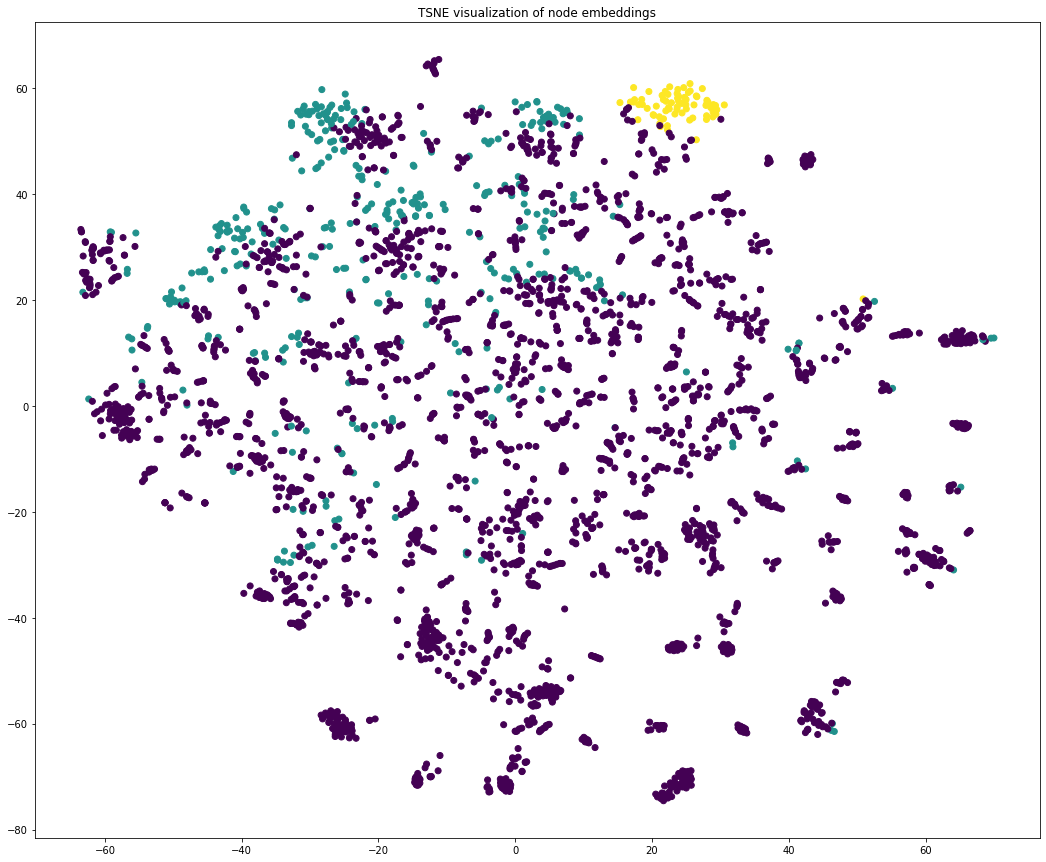

In [43]:
display_actor_cluster(actor_embeddings=actor_embeddings, ideal_cluster_size=ideal_cluster_size)

# <font color='red'>Task 2 : Apply clustering algorithm to group similar movies</font>


1. For this task consider only the movie nodes
2. Apply any clustering algorithm of your choice
3. Choose the number of clusters for which you have maximum score of $\text{Cost1}*\text{Cost2}$ <br>
4. $\text{Cost1} = \frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$, where N = number of clusters. <br>
(Write your code in <font color='blue'>def cost1()</font>)<br>
5. $\text{Cost2} = \frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$, where N= number of clusters. <br>
(Write your code in <font color='blue'>def cost2()</font>)<br>


<font color='blue'>Grouping similar movies</font>

In [44]:
def movie_clustering(data, movie_embeddings, movie_nodes, number_of_clusters):
    """
    This function groups similar movies.
    """
    all_costs = list()
    for each_cluster in tqdm(number_of_clusters):
        cost_1_list = list()
        cost_2_list = list()

        algo = KMeans(n_clusters=each_cluster)
        algo.fit(X=movie_embeddings)
        movie_labels = algo.labels_
        unique_labels = np.unique(ar=movie_labels) # unique labels obtained
        movie_label_df = pd.DataFrame() # dataframe of movies based on labels
        movie_label_df['movie'] = movie_nodes
        movie_label_df['label'] = movie_labels

        for ul in unique_labels:
            each_movie_label_df = movie_label_df[movie_label_df['label'] == ul]
            movie_for_label = each_movie_label_df['movie'].values

            actor_movie_df_list = list()
            for each_movie in movie_for_label:
                a_m_df = data[data['movie'] == each_movie]
                actor_movie_df_list.append(a_m_df)
            
            a_m_df_final = pd.concat(objs=actor_movie_df_list)
            edgs = list(map(tuple, a_m_df_final.values.tolist()))
            a_unique = a_m_df_final['actor'].unique()
            m_unique = a_m_df_final['movie'].unique()

            B = nx.Graph()
            B.add_nodes_from(nodes_for_adding=m_unique, bipartite=0, label='movie')
            B.add_nodes_from(nodes_for_adding=a_unique, bipartite=1, label='actor')
            B.add_edges_from(ebunch_to_add=edgs, label='acted')

            c1 = cost1(graph=B, number_of_clusters=each_cluster)
            cost_1_list.append(c1)
            c2 = cost2(graph=B, number_of_clusters=each_cluster, s='m')
            cost_2_list.append(c2)
        
        cost_metric = sum(cost_1_list) * sum(cost_2_list)
        all_costs.append(cost_metric)
    
    ideal_cluster_size = number_of_clusters[np.argmax(a=np.array(all_costs))]
    print("\nThe ideal cluser size is: {}.".format(ideal_cluster_size))

    plt.figure(figsize=(10, 8))
    plt.plot(number_of_clusters, all_costs, 'o-')
    plt.grid(True)
    plt.title(label='Elbow Curve')
    plt.xlabel(xlabel='K')
    plt.ylabel(ylabel='Costs')
    plt.show()
    
    return ideal_cluster_size

In [45]:
number_of_clusters = [3, 5, 10, 30, 50, 100, 200, 500]

100%|██████████| 8/8 [00:38<00:00,  4.76s/it]



The ideal cluser size is: 10.


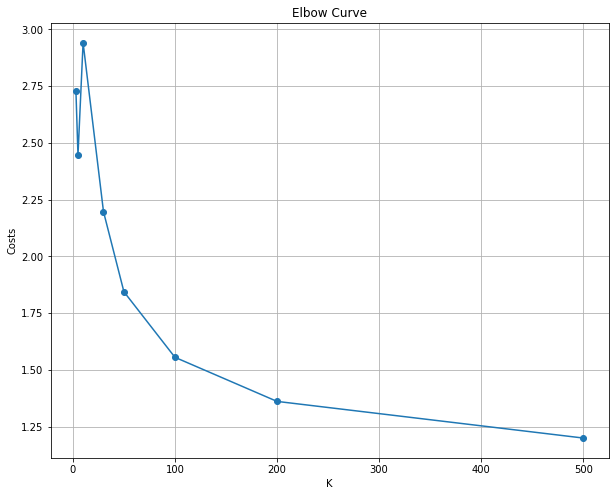

In [46]:
ideal_cluster_size = movie_clustering(data=data, 
                                      movie_embeddings=movie_embeddings, 
                                      movie_nodes=movie_nodes, 
                                      number_of_clusters=number_of_clusters)

<font color='blue'>Displaying similar movie clusters</font>

In [47]:
def display_movie_cluster(movie_embeddings, ideal_cluster_size):
    algo = KMeans(n_clusters=ideal_cluster_size)
    algo.fit(X=movie_embeddings)
    movie_labels = algo.labels_

    tsne = TSNE(n_components=2)
    movie_embeddings_2d = tsne.fit_transform(X=movie_embeddings)

    plt.figure(figsize=(18, 15))
    plt.scatter(x=movie_embeddings_2d[:,0], y=movie_embeddings_2d[:,1], c=movie_labels)
    plt.title(label='TSNE visualization of node embeddings')
    plt.show()

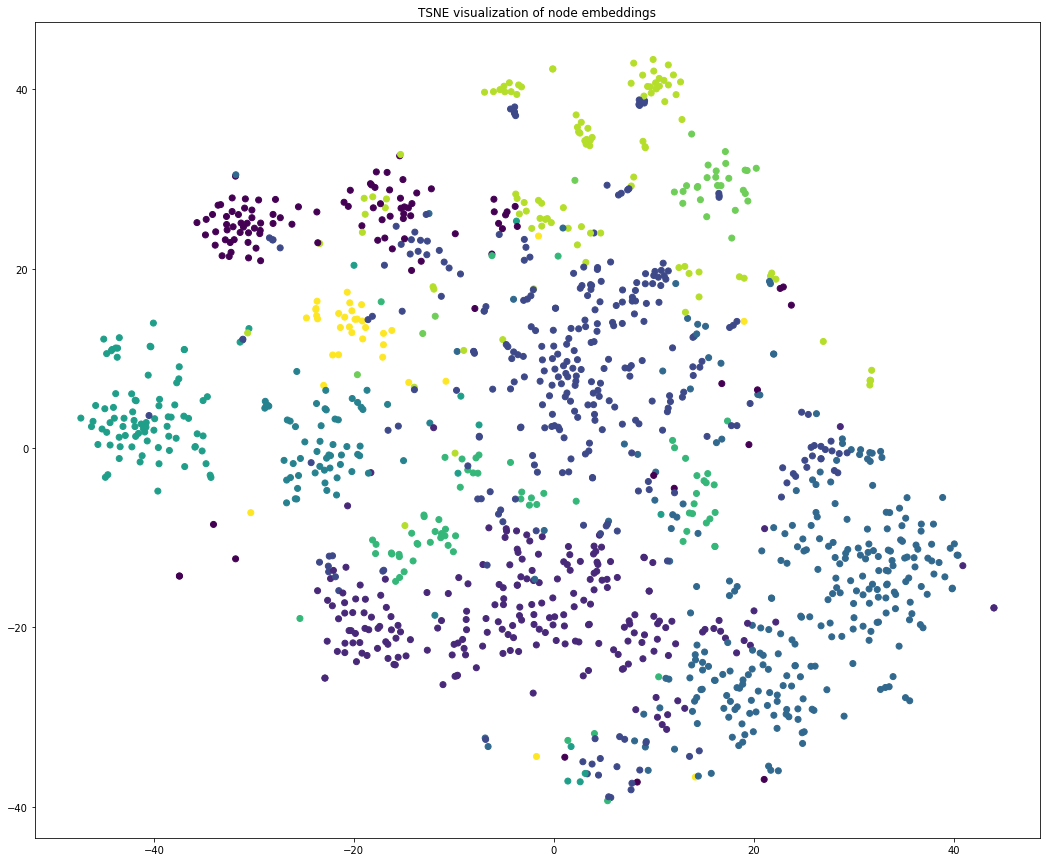

In [48]:
display_movie_cluster(movie_embeddings=movie_embeddings, ideal_cluster_size=ideal_cluster_size)

End of the file.